In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Load Dataset

In [2]:
# Load the dataset
df = pd.read_csv('/content/KNNAlgorithmDataset.csv')

Split features (X) and labels (y)

In [3]:
X = df.iloc[:,2:-1].values  # All rows and all columns except the last one (features)
y = df.iloc[:,1].values     # All rows, only the last column (Species)

In [4]:
# Split the last row as the testing set (the one with the missing label)
X = X[:-1]  # Exclude the last row for training
y = y[:-1]

Split data into training and testing sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [6]:
# Display the shapes of the training and test sets
print("Training features shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

Training features shape: (397, 30)
Training labels shape: (397,)
Test features shape: (171, 30)
Test labels shape: (171,)


In [7]:
# Euclidean distance function
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

K-NN prediction function

In [8]:
def knn_predict(X_train, y_train, X_test, k):
    predictions = []
    # Loop through each test point
    for test_point in X_test:
        distances = []
        # Calculate distances between the test point and all training points
        for i in range(len(X_train)):
            dist = euclidean_distance(test_point, X_train[i])
            distances.append((dist, y_train[i]))
        # Sort based on distance and select the k nearest neighbors
        distances.sort(key=lambda x: x[0])
        k_nearest_neighbors = [distances[i][1] for i in range(k)]
        # Determine the most common class label
        most_common = Counter(k_nearest_neighbors).most_common(1)[0][0]
        predictions.append(most_common)
    return predictions

In [9]:
# Function to calculate accuracy
def calculate_accuracy(y_true, y_pred):
    return np.sum(np.array(y_pred) == y_true) / len(y_true)


In [10]:
# Confusion matrix function
def confusion_matrix(y_true, y_pred):
    classes = np.unique(y_true)
    matrix = np.zeros((len(classes), len(classes)), dtype=int)
    class_to_index = {label: idx for idx, label in enumerate(classes)}

    for true_label, pred_label in zip(y_true, y_pred):
        matrix[class_to_index[true_label], class_to_index[pred_label]] += 1

    return matrix

In [11]:
# Predict the labels for the entire test set
print("Enter k:")
k = int(input())
y_pred = knn_predict(X_train, y_train, X_test, k)

Enter k:
5


In [12]:
# Compare predictions with the actual test labels
print("\nPredicted labels for the test set:", y_pred)
print("Actual labels for the test set:   ", list(y_test))


Predicted labels for the test set: ['M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B']
Actual labels for the test set:    ['M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B

In [13]:
# Calculate accuracy
accuracy = calculate_accuracy(y_test, y_pred)
print(f"\nAccuracy on the test set: {accuracy * 100:.2f}%")


Accuracy on the test set: 94.74%


In [14]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[103   5]
 [  4  59]]


In [15]:
# Plotting K vs Accuracy and K vs Error
k_values = range(1, 21)
accuracies = []
errors = []

for k in k_values:
    y_pred_k = knn_predict(X_train, y_train, X_test, k)
    accuracy_k = calculate_accuracy(y_test, y_pred_k)
    accuracies.append(accuracy_k)
    errors.append(1 - accuracy_k)  # Error is 1 - Accuracy

In [16]:
# Plot the K vs Accuracy and K vs Error curves
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

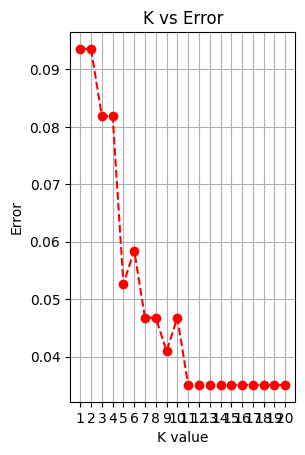

In [17]:
# Subplot for error
plt.subplot(1, 2, 2)
plt.plot(k_values, errors, marker='o', linestyle='--', color='r')
plt.title('K vs Error')
plt.xlabel('K value')
plt.ylabel('Error')
plt.xticks(k_values)
plt.grid(True)


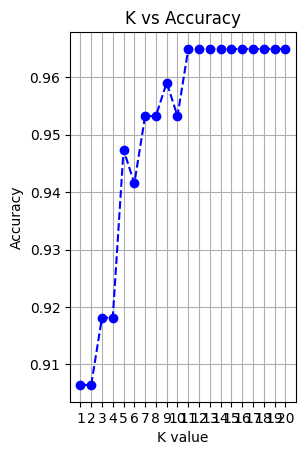

In [18]:
# Subplot for accuracy
plt.subplot(1, 2, 1)
plt.plot(k_values, accuracies, marker='o', linestyle='--', color='b')
plt.title('K vs Accuracy')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)

In [19]:
# Show both plots
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [20]:
# Finding the optimal K
optimal_k = k_values[np.argmax(accuracies)]
print(f"\nOptimal value of K is {optimal_k} with an accuracy of {max(accuracies) * 100:.2f}%")



Optimal value of K is 11 with an accuracy of 96.49%
